In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Bidirectional

In [17]:
df=pd.read_csv("AirQuality.csv", sep=';')
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


In [19]:
print(df.columns)

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH', 'Unnamed: 15', 'Unnamed: 16'],
      dtype='object')


In [25]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578"
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255"
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502"
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867"
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
target_feature = 'CO(GT)'
data = df[target_feature]

# Handle invalid values
data = pd.to_numeric(data, errors='coerce')
data = data.replace(-200, np.nan)
data = data.dropna()

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data.values.reshape(-1, 1))

In [31]:
sequence_length = 10
X = []
y = []

for i in range(len(data_scaled) - sequence_length):
    X.append(data_scaled[i:i+sequence_length])
    y.append(data_scaled[i+sequence_length])

X = np.array(X)
y = np.array(y)

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (535, 10, 1)
Shape of y: (535, 1)


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

model = Sequential([
    Bidirectional(LSTM(32, activation='tanh'), input_shape=(sequence_length, 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

C:\Users\lenovo\anaconda3\Lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [35]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

y_pred = model.predict(X_test)

y_test_inv = scaler.inverse_transform(y_test)
y_pred_inv = scaler.inverse_transform(y_pred)

Epoch 1/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 116ms/step - loss: 0.0390 - val_loss: 0.0738
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0292 - val_loss: 0.0723
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0269 - val_loss: 0.0776
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0279 - val_loss: 0.0756
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0268 - val_loss: 0.0739
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0290 - val_loss: 0.0747
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0232 - val_loss: 0.0745
Epoch 8/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0252 - val_loss: 0.0745
Epoch 9/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0252 - val_loss: 0.0740
Epoch 10/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0291 - val_loss: 0.0745
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 146ms/step


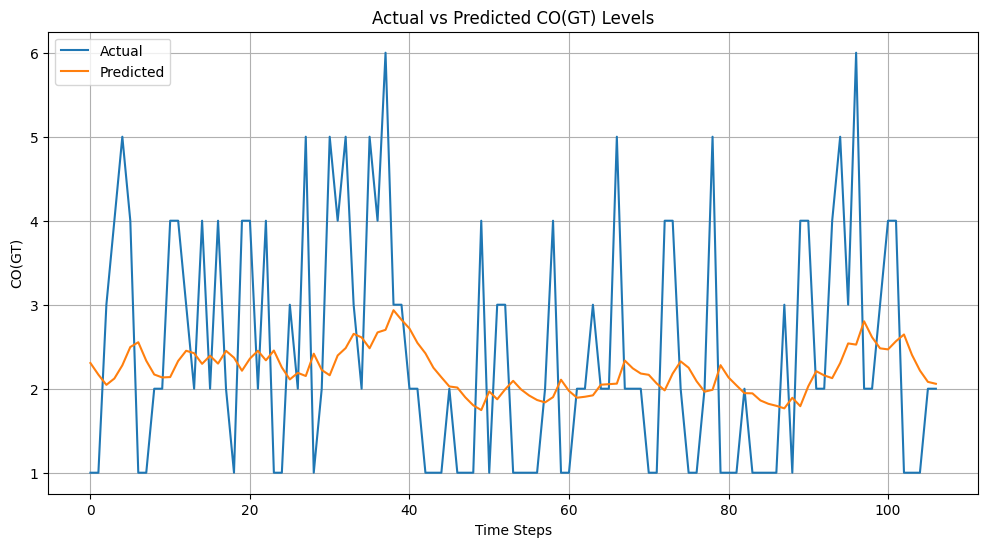


 Bidirectional RNN Benefit:
In time series, Bidirectional RNNs consider past and future information, helping the model understand context better and make more accurate predictions.


In [37]:
plt.figure(figsize=(12,6))
plt.plot(y_test_inv, label='Actual')
plt.plot(y_pred_inv, label='Predicted')
plt.title('Actual vs Predicted CO(GT) Levels')
plt.xlabel('Time Steps')
plt.ylabel('CO(GT)')
plt.legend()
plt.grid(True)
plt.show()


print("\n Bidirectional RNN Benefit:")
print("In time series, Bidirectional RNNs consider past and future information, helping the model understand context better and make more accurate predictions.")